This code was used to analysise the meta data from the drone flights to assess GSD. This code may be useful for creating plots however to plot these points geospatialy I used QGIS.

The Red lines in some plots show the resolution of MAXAR (we should aim to have higher resolution than satelite!) the areas covered were a large overestimate as they dont facting in image overlap.


In [1]:
# Imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
# Read in meta data .csv

p4_meta1 = pd.read_csv('P4/P4_DCIM_1_Export.csv')
p4_meta2 = pd.read_csv('P4/P4_DCIM_2_Export.csv')

In [3]:
p4_meta = pd.concat([p4_meta1,p4_meta2])             # Merging the two dataframes

In [4]:
# Creating a distence to ground coloumn

p4_meta['D2G'] = p4_meta['GPSAltitude'] - p4_meta['SAMPLE_1']         

# The 'SAMPLE_1' coloumn contains elevations from a DSM for that images location

In [5]:
p4_meta['D2G']

0        113.190
1        105.402
2        110.830
3        122.727
4        119.449
          ...   
12955    185.801
12956    144.910
12957    147.025
12958    135.417
12959    103.543
Name: D2G, Length: 27340, dtype: float64

In [6]:
# Create a 'GSD' Coloumn

# The formula to calculate GSD 'Ground Surface Distance':
# (("GPSAltitude" - "SAMPLE_1") * "ImageHeight")/("FocalLength" * "ImageHeight")

p4_meta['GSD'] = (p4_meta['D2G'] * p4_meta['ImageHeight']) / (p4_meta['FocalLength'] * p4_meta['ImageHeight'])

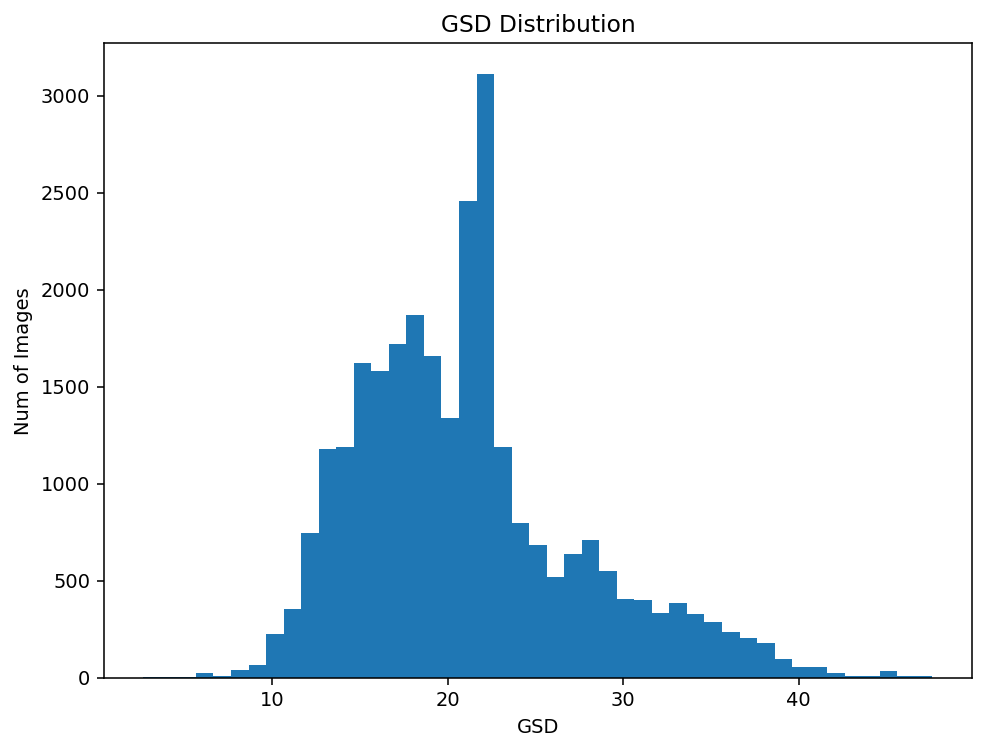

In [7]:
# Plot GSD Distribution Graph

title = 'GSD Distribution'
x = 'GSD'
y = 'Num of Images'

fig = plt.figure(figsize = (8,6),dpi=140)
ax = fig.add_subplot(1, 1, 1)
ax.set_title(title)
ax.set_xlabel(x)
ax.set_ylabel(y)

plt.hist(p4_meta['GSD'], bins=np.arange(p4_meta['GSD'].min(), p4_meta['GSD'].max()+1))

plt.plot;

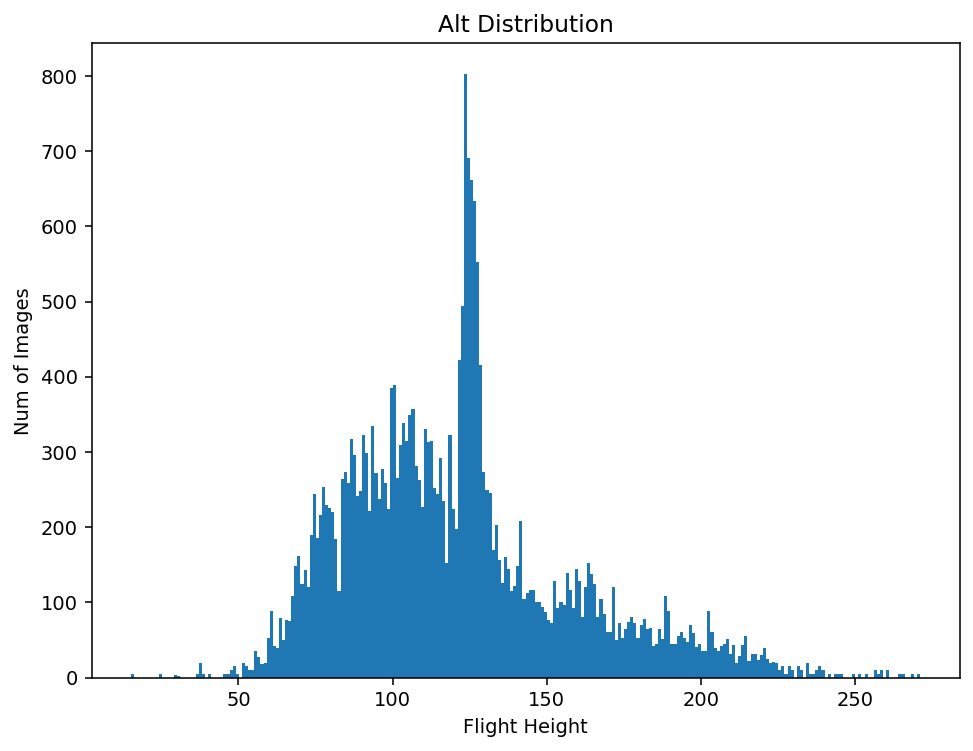

In [8]:
# Plot Drone Flight Height Graph

title = 'Alt Distribution'
x = 'Flight Height'
y = 'Num of Images'

fig = plt.figure(figsize = (8,6),dpi=140)
ax = fig.add_subplot(1, 1, 1)
ax.set_title(title)
ax.set_xlabel(x)
ax.set_ylabel(y)

plt.hist(p4_meta['D2G'], bins=np.arange(p4_meta['D2G'].min(), p4_meta['D2G'].max()+1))

plt.plot;

In [9]:
# Bin the Flight Heights to create a more readable graph

bins = np.arange(0,250,5)
labels = np.arange(0,245,5)
p4_meta['num_of_images'] = pd.cut(p4_meta['D2G'], bins=bins, labels=labels)

# Create dataframe
test = pd.DataFrame(pd.cut(p4_meta['num_of_images'], bins=bins, labels= labels, ordered = True).value_counts())
test = test.reindex(np.arange(0,250,5))
test['D2G'] = test.index

# Calculate area of images this is an overestimate as doesnt factor in image overlap
test['area'] = ((test['D2G'] * 1300) / (5.7 * 1300)) * 2000000 * test['num_of_images'] * 10**-10

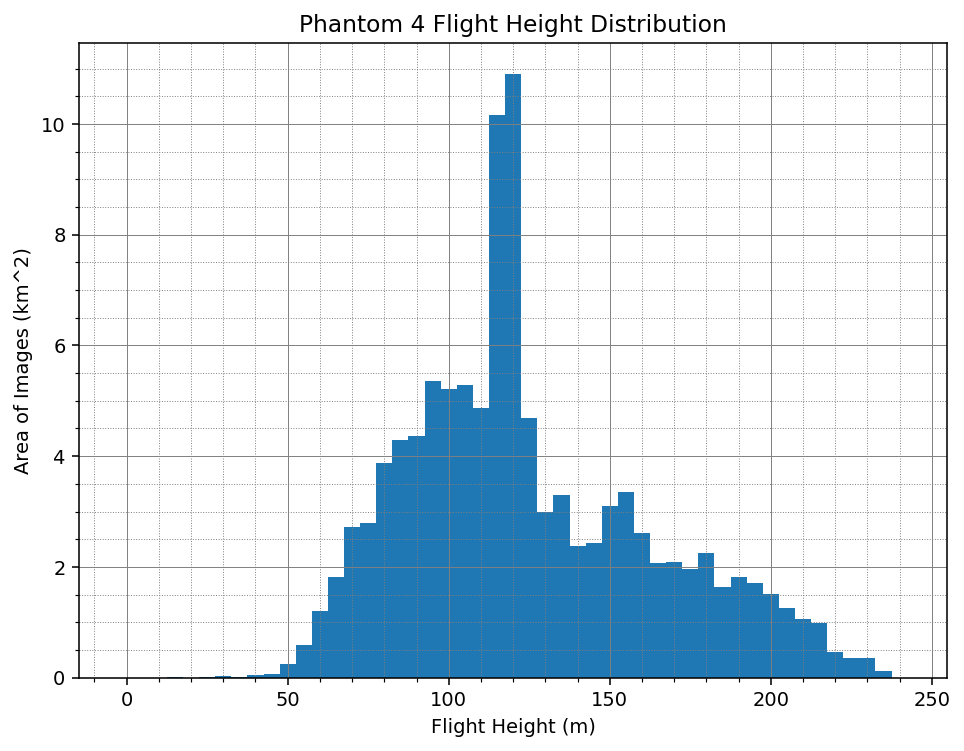

In [10]:
# Plot the flight height against area 

title = 'Phantom 4 Flight Height Distribution'
x = 'Flight Height (m)'
y = 'Area of Images (km^2)'

fig = plt.figure(figsize = (8,6),dpi=140)
ax = fig.add_subplot(1, 1, 1)
ax.set_title(title)
ax.set_xlabel(x)
ax.set_ylabel(y)
# ax.set_yscale('log')

plt.bar(test['D2G'], test['area'], width=5)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')

plt.plot;

In [11]:
# Create bins for flight area estimate graph

# GSD = (flight altitude x sensor height) / (focal length x image height)
# area = GSD x 2000000 x num of images

bins = np.arange(0,50,1)
labels = np.arange(0,49,1)
p4_meta['num_of_images'] = pd.cut(p4_meta['GSD'], bins=bins, labels=labels)

test = pd.DataFrame(pd.cut(p4_meta['num_of_images'], bins=bins, labels= labels, ordered = True).value_counts())
test = test.reindex(np.arange(0,50,1))
test['GSD'] = test.index

# This is an overestimate for area as doesnt factor in image overlap
test['area'] = test['GSD'] * 2000000 * test['num_of_images'] * 10**-10

# This could be taken further by accounting for FOV of the camera and Surface topography

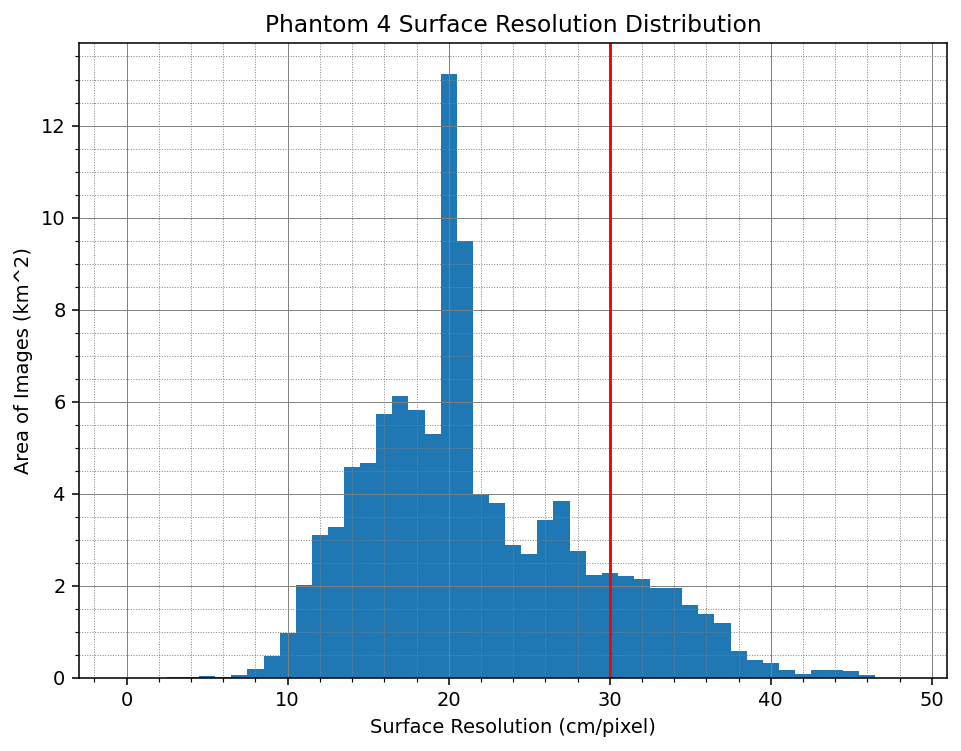

In [12]:
# Plot GSD against area

title = 'Phantom 4 Surface Resolution Distribution'
x = 'Surface Resolution (cm/pixel)'
y = 'Area of Images (km^2)'

fig = plt.figure(figsize = (8,6),dpi=140)
ax = fig.add_subplot(1, 1, 1)
ax.set_title(title)
ax.set_xlabel(x)
ax.set_ylabel(y)
# ax.set_yscale('log')

plt.bar(test['GSD'], test['area'], width=1)
plt.axvline(30, 0, 12,c='r')
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')

plt.plot;

In [ ]:

# REPEAT FOR M300 DATA


In [13]:
# Read in meta data .csv 
m300_meta = pd.read_csv('M300/M300_DCIM_Export.csv')

In [14]:
# Calculate Distance to ground
m300_meta['D2G'] = m300_meta['GPSAltitude'] - m300_meta['SAMPLE_1']

In [15]:
# Calculate GSD
m300_meta['GSD'] = (m300_meta['D2G'] * m300_meta['ImageHeight']) / (m300_meta['FocalLength'] * m300_meta['ImageHeight'])

In [16]:
# Flight Height

bins = np.arange(0,400,5)
labels = np.arange(0,395,5)
m300_meta['num_of_images'] = pd.cut(m300_meta['D2G'], bins=bins, labels=labels)

test = pd.DataFrame(pd.cut(m300_meta['num_of_images'], bins=bins, labels= labels, ordered = True).value_counts())
test = test.reindex(np.arange(0,400,5))
test['D2G'] = test.index

test['area'] = ((test['D2G'] * 1300) / (5.7 * 1300)) * 2000000 * test['num_of_images'] * 10**-10

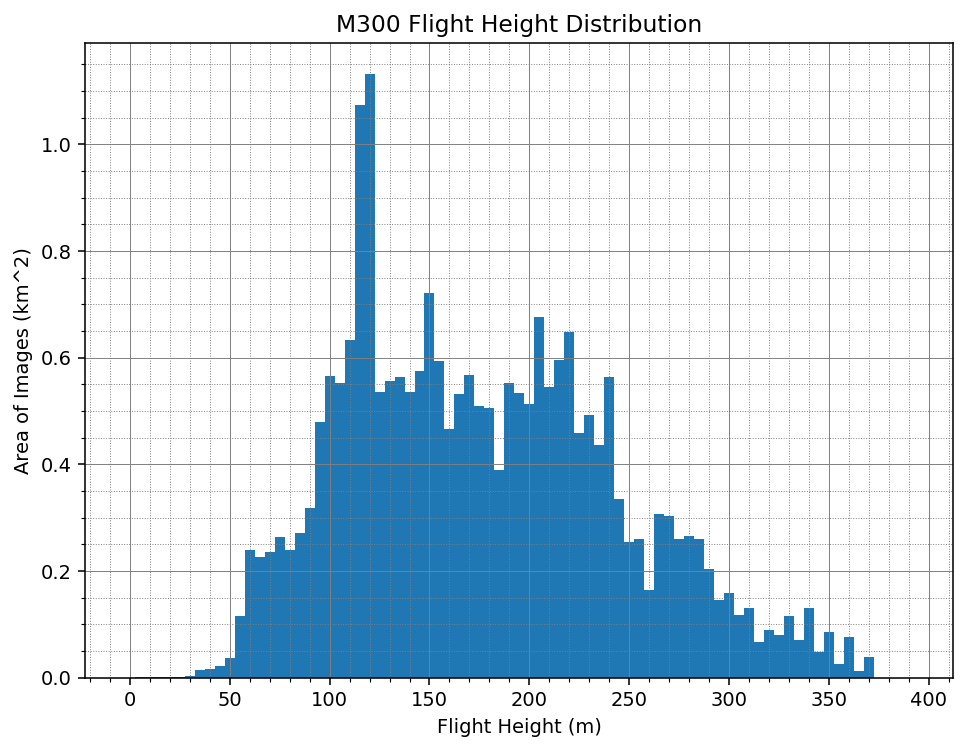

In [17]:
title = 'M300 Flight Height Distribution'
x = 'Flight Height (m)'
y = 'Area of Images (km^2)'

fig = plt.figure(figsize = (8,6),dpi=140)
ax = fig.add_subplot(1, 1, 1)
ax.set_title(title)
ax.set_xlabel(x)
ax.set_ylabel(y)

plt.bar(test['D2G'], test['area'], width=5)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')

plt.plot;

In [18]:
# GSD

bins = np.arange(0,50,1)
labels = np.arange(0,49,1)
m300_meta['num_of_images'] = pd.cut(m300_meta['GSD'], bins=bins, labels=labels)

test = pd.DataFrame(pd.cut(m300_meta['num_of_images'], bins=bins, labels= labels, ordered = True).value_counts())
test = test.reindex(np.arange(0,50,1))
test['GSD'] = test.index

test['area'] = test['GSD'] * 20000000 * test['num_of_images'] * 10**-10

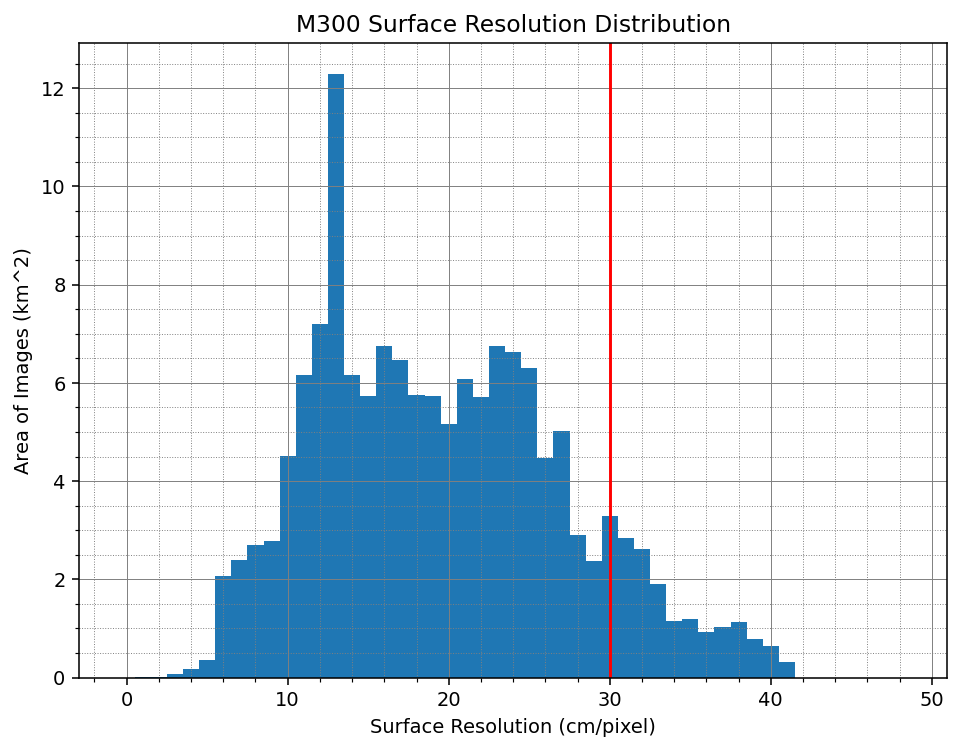

In [19]:
title = 'M300 Surface Resolution Distribution'
x = 'Surface Resolution (cm/pixel)'
y = 'Area of Images (km^2)'

fig = plt.figure(figsize = (8,6),dpi=140)
ax = fig.add_subplot(1, 1, 1)
ax.set_title(title)
ax.set_xlabel(x)
ax.set_ylabel(y)
# ax.set_yscale('log')

plt.bar(test['GSD'], test['area'], width=1)
plt.axvline(30, 0, 12,c='r')
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')

plt.plot;